## Capstone Project

In this Capstone Project we will be engaging with the stock price data from MSN Money, which can be found at:
./Data/histroical-stock-prices.csv

In this Notebook we will be looking at financial forecasting with machine learning.

### Outline:
1. Getting and describing the data.

2. Exploring, cleaning and visualizing the data

3. Developing analytics

4. Using Correlation
Using Cointegration (optional)

Risk review: improving accuracy and realism

5. Time keeps on ticking into the future
Operational concerns

Extending the scope

6. Ideas for further strategies
Devloping analytics

Wrapping up

### Options
As we progress you are encouraged to take this dataset further. You are also encouraged to explore any aspects of the data. Develop your own algorithms. Be explicit about your inquiry and success in predicting affects on our world.

### Warning: Not financial advice
This exercise is meant purely for educational purposes, uses many simplifications and is not intended, nor should be considered as financial advice. There are many risks involved in implementation of financial trading strategies that are not considered nor described here.

### Setting up
If you have not yet set up your environment, you can easily do so with VS Code, and the python extension and Anaconda.  
#TODO Add more details and links

### Getting our tools and data

In [18]:
# Bring our tools in:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
rows = None
stocks = pd.read_csv('./Data/daily-historical-sample.csv', nrows=rows)

Now that we have our data loaded, let's explore what we have.

In [4]:
stocks.head()

,Unnamed: 0,ticker,open,close,adj_close,low,high,volume,date,dt
0,70002,RRC,63.650002,62.049999,60.994125,61.250000,63.650002,2271200,2013-01-02,2013-01-02
1,70021,RRC,61.970001,63.400002,62.321163,61.630001,63.919998,1842400,2013-01-03,2013-01-03
2,70028,RRC,63.630001,65.139999,64.031532,63.439999,65.190002,1268200,2013-01-04,2013-01-04
3,70042,RRC,65.110001,65.209999,64.100365,64.430000,65.610001,1692900,2013-01-07,2013-01-07
4,70050,RRC,65.019997,64.169998,63.078049,63.389999,65.099998,1776700,2013-01-08,2013-01-08


While the head gives a good view of a piece, it may not be a great view of the data, especially for larger data sets or ones that may have been sorted at some point.  We can investigate numerical columns with describe.  

In [5]:
stocks.describe()

,Unnamed: 0,open,close,adj_close,low,high,volume
count,6.196360e+05,619636.000000,619636.000000,619636.000000,619636.000000,619636.000000,6.196360e+05
mean,1.087471e+07,79.067758,79.082518,75.544285,78.324008,79.797608,4.579010e+06
std,6.028124e+06,84.712340,84.713877,84.457066,83.921011,85.451040,8.639048e+06
min,7.000200e+04,1.660000,1.590000,1.590000,1.500000,1.710000,1.000000e+02
25%,5.438592e+06,38.310001,38.310001,35.458687,37.919998,38.700001,1.210700e+06
50%,1.095230e+07,60.009998,60.040001,56.349380,59.439999,60.606785,2.308300e+06
75%,1.597729e+07,92.629997,92.660004,88.014315,91.830002,93.430000,4.624100e+06
max,2.091374e+07,1919.390015,1919.650024,1919.650024,1902.540039,1925.000000,6.166205e+08


In [6]:
# And another way to summarize data
# This method lets us know the type of columns, how many non-null values there are,
# and the size of the data set, among other things.
stocks.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619636 entries, 0 to 619635
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  619636 non-null  int64  
 1   ticker      619636 non-null  object 
 2   open        619636 non-null  float64
 3   close       619636 non-null  float64
 4   adj_close   619636 non-null  float64
 5   low         619636 non-null  float64
 6   high        619636 non-null  float64
 7   volume      619636 non-null  int64  
 8   date        619636 non-null  object 
 9   dt          619636 non-null  object 
dtypes: float64(5), int64(2), object(3)
memory usage: 47.3+ MB


Let's shift the data to a Tidy Data format where each column is an variable and each row is an observation.  This form of data is the one expected by Scikit Learn, one of the premier machine learning packages.  For more information on rearranging your data see TODO, or you can learn from the excellent work by [Hadley Wickham](https://vita.had.co.nz/papers/tidy-data.pdf).  

In [7]:
closes = stocks.pivot(index='dt', columns='ticker', values='adj_close')

In [11]:
# We can look at the number of observations and the number of columns
closes.shape

(1423, 441)

In [13]:
# let's see what those columns are
closes.columns

Index(['A', 'AAL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM',
       ...
       'XL', 'XLNX', 'XOM', 'XRAY', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS'],
      dtype='object', name='ticker', length=441)

In [14]:
# So we can see that they are indeed all stock tickers.
closes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1423 entries, 2013-01-02 to 2018-08-24
Columns: 441 entries, A to ZTS
dtypes: float64(441)
memory usage: 4.8+ MB


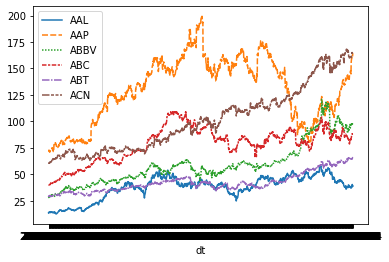

In [19]:
sns.lineplot(data=closes[['AAL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN']])

For modelling data with machine learning, it is helpful to transform the data into a form that is closer to the theoretical expectations where the ML models should perform well. 

In [ ]:
returns = 